# **Problem Statement**

*   Exploratory Data Analysis(EDA) is a method used to analyze and summarize datasets.

*   For this you are requested to visit kaggle.com and work on the dataset that can be found from here :
https://www.kaggle.com/datasets/hesh97/titanicdataset-traincsv

*   Titanic Dataset contains information of all the passengers aboard in the titanic,which unfortunately was shipwrecked.

*   This dataset can be used to predict whether a given passenger survived or not.

### **Dataset Descriptions-**

*   **PassengerId:** Unique ID of the passenger.
*   **Survived:** Whether the passenger survived or not. 0-No, 1-Yes
*   **Pclass:** This feature represents the class of the
    passenger's reservation, i.e., class-1, class-2, class-3.
*   **Name:** Name of the passenger
*   **Sex:** Male/Female
*   **Age:** Age of the passenger
*   **SibSp:** Number of siblings/spouses aboard.
*   **Parch:** Number of parents/children aboard.
*   **Ticket:** Ticket number of the passenger.
*   **Fare:** The cost of the ticket.
*   **Cabin:** It is the cabin number of the passenger.
*   **Embarked:** It represents the location from where the
      passengers embarked on the ship. In this feature, (S=Southampton; C=Cherbourg;Q=Queenstown.)

## **Importing Liabraries**

In [174]:
import numpy as np                  # Importing Numpy
import pandas as pd                 # Importing Pandas
import matplotlib.pyplot as plt     # Importing matplotlib
import seaborn as sns               # Importing Seaborn
import os
%matplotlib inline

### **Loading the Dataset**

In [175]:
data=pd.read_csv('/content/train.csv')
print("The shape of the data is :", data.shape)
data.head()

The shape of the data is : (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### **Observation**

- In this dataset we have 891 rows and 12 columns

#### Column Types

- **Numerical** - Age,Fare,PassengerId
- **Categorical** - Survived, Pclass, Sex, SibSp, Parch,Embarked
- **Mixed** - Name, Ticket, Cabin

### **Exploratory Data Analysis(EDA)**

In [176]:
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### **Checking missing values**

<Axes: >

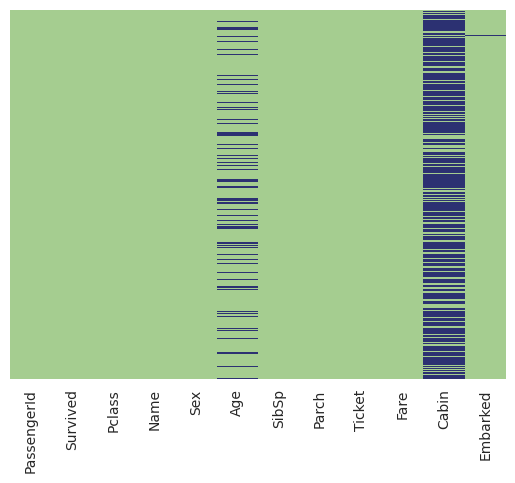

In [178]:
sns.heatmap(data.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='crest')

In [179]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Conclusions:

1. Missing values in Age, Cabin and Embarked columns
2. More than 70 percent values are missing in cabin columns, they have to drop
3. Few columns have inappropriate data types

In [180]:
# Dropping cabin column
data.drop(columns=['Cabin'],inplace=True)

In [181]:
# Imputing missing values for age
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [182]:
# Imputing missing values for embarked
# finding the most appeared value in embarked column

data['Embarked'].value_counts()
data['Embarked'].fillna('S', inplace=True) # S it is

In [183]:

data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [184]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

#### Changing data type

In [185]:
data['Survived']=data['Survived'].astype('category')
data['Pclass']=data['Pclass'].astype('category')
data['Sex']=data['Sex'].astype('category')
data['Age']=data['Age'].astype('int')
data['Embarked']=data['Embarked'].astype('category')

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [187]:
data.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


##### **Univariate Analysis**


Out of 891 people 62 died in the accident


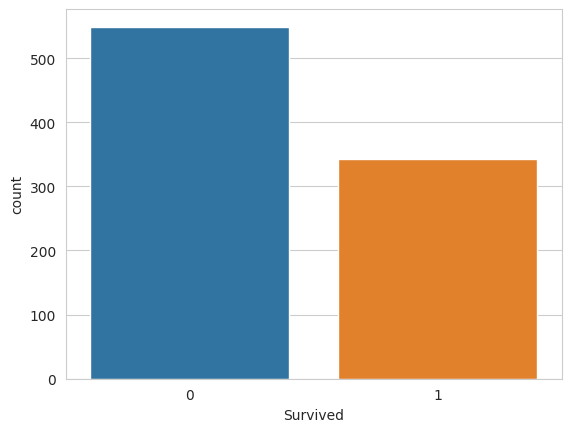

In [188]:
# Let's start with the Survived col

sns.countplot(x='Survived',data=data)
print("Out of 891 people {} died in the accident".format(death_percent))

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


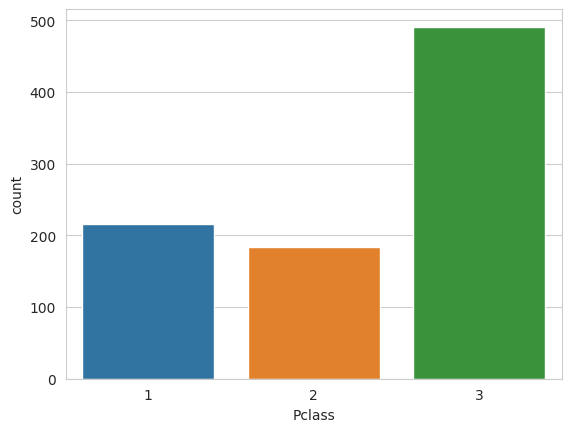

In [189]:
 #Pclass column
sns.countplot(x='Pclass', data=data)
print((data['Pclass'].value_counts()/891)*100)

male      64.758698
female    35.241302
Name: Sex, dtype: float64


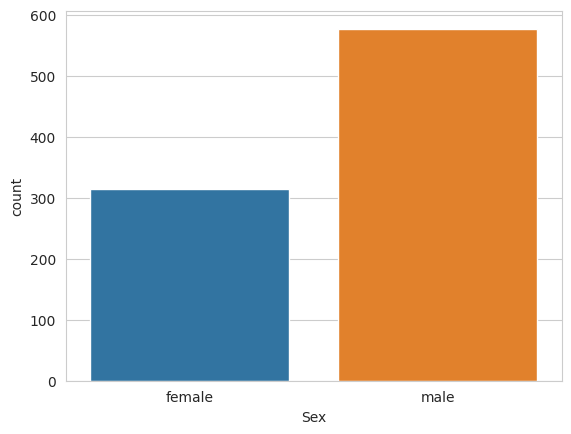

In [190]:
sns.countplot(x='Sex', data=data)
print((data['Sex'].value_counts()/891)*100)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


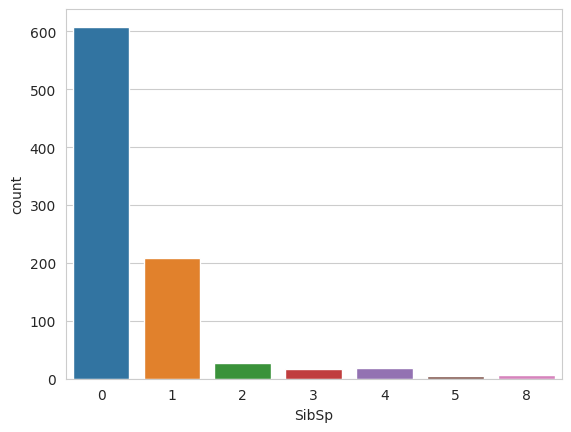

In [191]:
sns.countplot(x='SibSp', data=data)
print(data['SibSp'].value_counts())

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


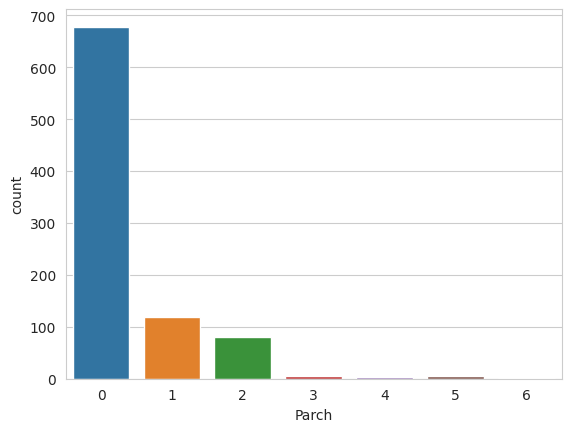

In [192]:
sns.countplot(x='Parch', data=data)
print((data['Parch'].value_counts()/891)*100)


S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


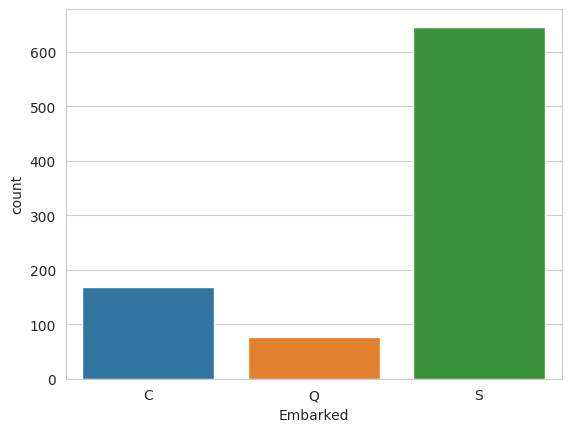

In [193]:
sns.countplot(x='Embarked', data=data)
print((data['Embarked'].value_counts()/891)*100)

Text(0.5, 0, 'Age')

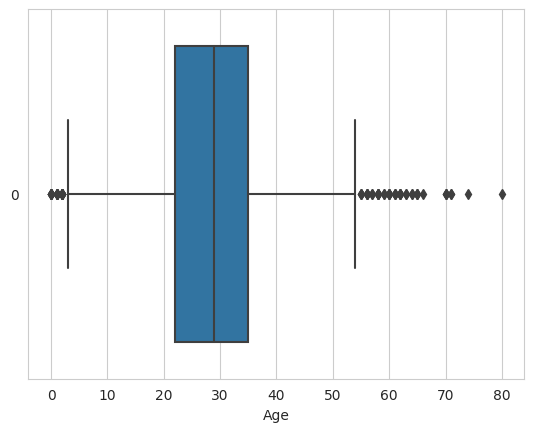

In [194]:
sns.boxplot(data['Age'],orient = "h")
plt.xlabel("Age")

#### **Multivariate Analysis**


Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


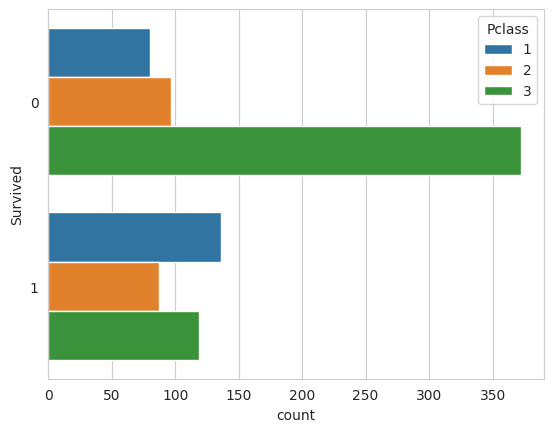

In [195]:
# Survival with Pclass

sns.countplot(data=data, y ="Survived", hue = "Pclass")
pd.crosstab(data['Pclass'], data['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


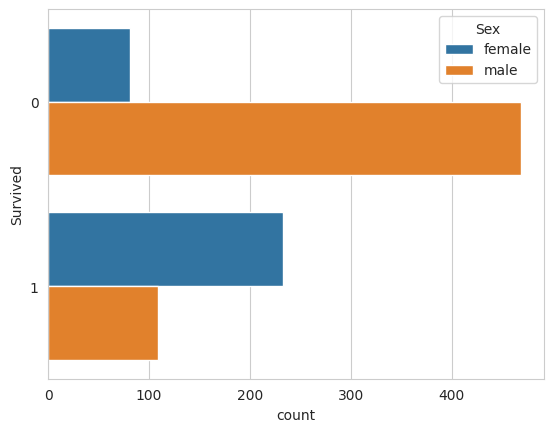

In [196]:
# Survival with Sex

sns.countplot(data=data, y ="Survived", hue = "Sex")
pd.crosstab(data['Sex'], data['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


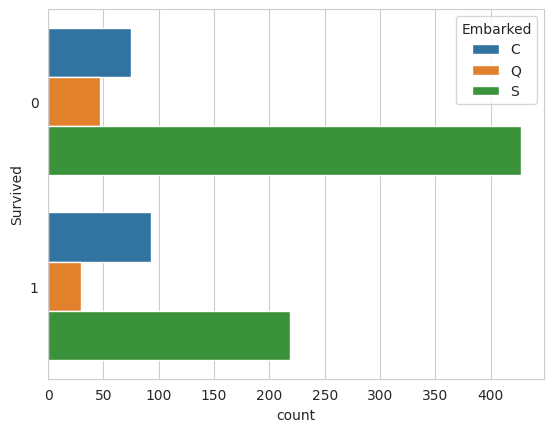

In [197]:
# Survival with Embarked

sns.countplot(data=data, y ="Survived", hue = "Embarked")
pd.crosstab(data['Embarked'], data['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

<ipython-input-198-69fc5e9e0d4b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Survived']==0]['Age'])
<ipython-input-198-69fc5e9e0d4b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Survived']==1]['Age'])


<Axes: xlabel='Age', ylabel='Density'>

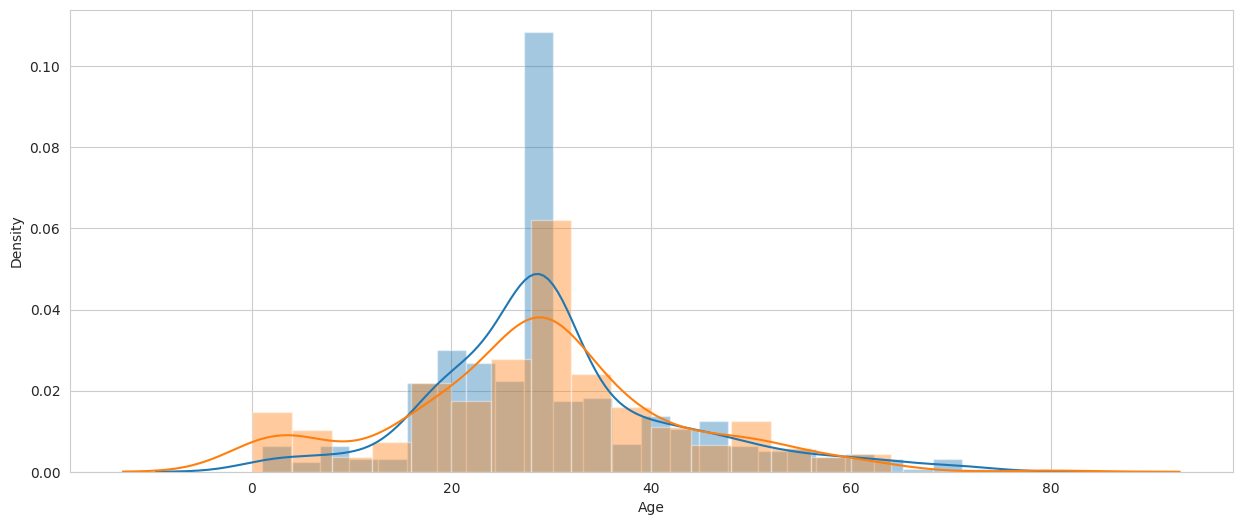

In [198]:
# Survived with Age

plt.figure(figsize=(15,6))
sns.distplot(data[data['Survived']==0]['Age'])
sns.distplot(data[data['Survived']==1]['Age'])

<ipython-input-199-f7baad18d5fe>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Survived']==0]['Fare'])
<ipython-input-199-f7baad18d5fe>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Survived']==1]['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

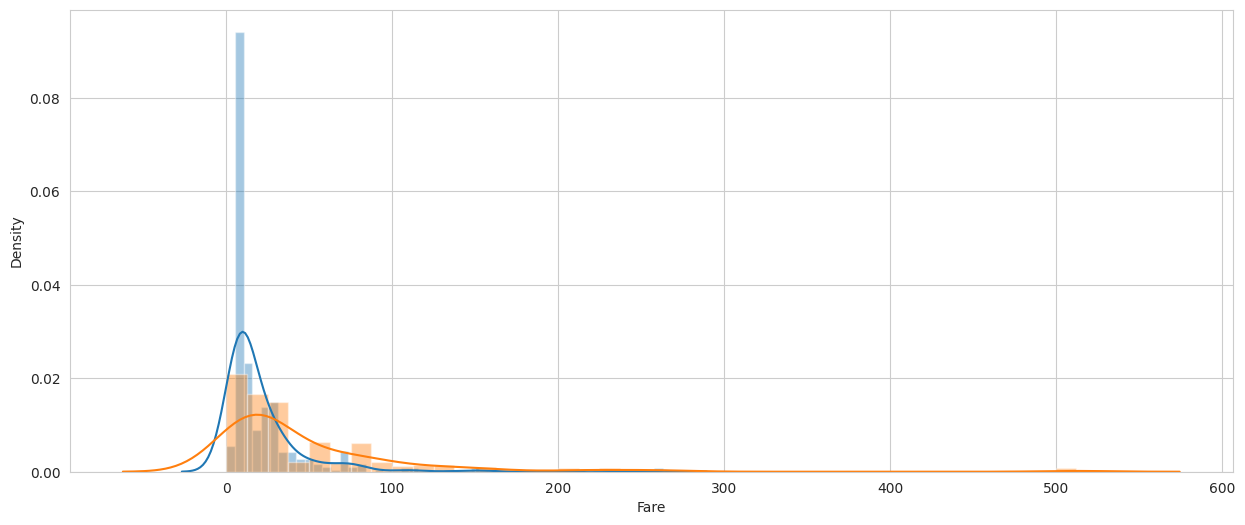

In [199]:
# Survived with Fare

plt.figure(figsize=(15,6))
sns.distplot(data[data['Survived']==0]['Fare'])
sns.distplot(data[data['Survived']==1]['Fare'])

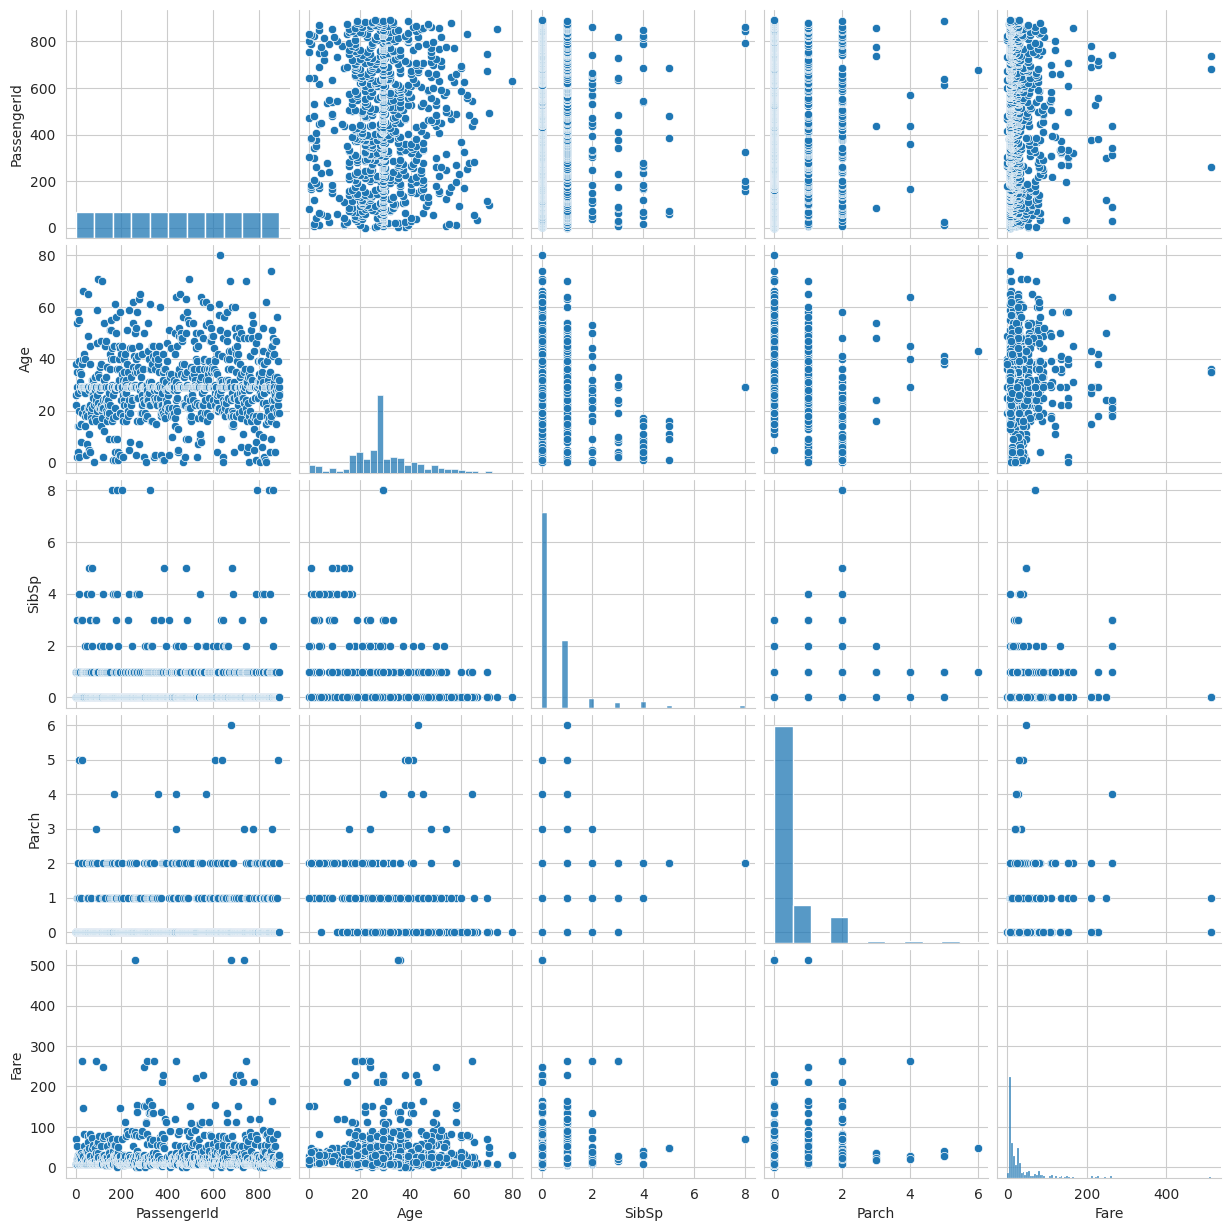

In [200]:
sns.pairplot(data)

#### **Feature Engineering**


In [201]:
# We will create a new column by the name of family which will be the sum of SibSp and Parch cols

data['family_size']=data['Parch'] + data['SibSp']

In [202]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
442,443,0,3,"Petterson, Mr. Johan Emil",male,25,1,0,347076,7.775,S,1
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18,1,0,PC 17757,227.525,C,1
812,813,0,2,"Slemen, Mr. Richard James",male,35,0,0,28206,10.500,S,0
600,601,1,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24,2,1,243847,27.000,S,3
480,481,0,3,"Goodwin, Master. Harold Victor",male,9,5,2,CA 2144,46.900,S,7


In [203]:

def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"

In [204]:
data['family_type']=data['family_size'].apply(family_type)

In [205]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
588,589,0,3,"Gilinski, Mr. Eliezer",male,22,0,0,14973,8.0500,S,0,Alone
150,151,0,2,"Bateman, Rev. Robert James",male,51,0,0,S.O.P. 1166,12.5250,S,0,Alone
421,422,0,3,"Charters, Mr. David",male,21,0,0,A/5. 13032,7.7333,Q,0,Alone
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26,0,0,19877,78.8500,S,0,Alone
346,347,1,2,"Smith, Miss. Marion Elsie",female,40,0,0,31418,13.0000,S,0,Alone


In [206]:
# Dropping SibSp, Parch and family_size

data.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [207]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
45,46,0,3,"Rogers, Mr. William John",male,29,S.C./A.4. 23567,8.0500,S,Alone
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,29,2689,14.4583,C,Medium
354,355,0,3,"Yousif, Mr. Wazli",male,29,2647,7.2250,C,Alone
305,306,1,1,"Allison, Master. Hudson Trevor",male,0,113781,151.5500,S,Medium
644,645,1,3,"Baclini, Miss. Eugenie",female,0,2666,19.2583,C,Medium


In [208]:
pd.crosstab(data['family_type'], data['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


<ipython-input-209-bfaa68d5ebcd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True,cmap="crest")


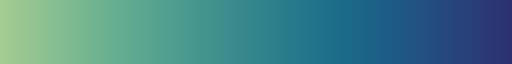

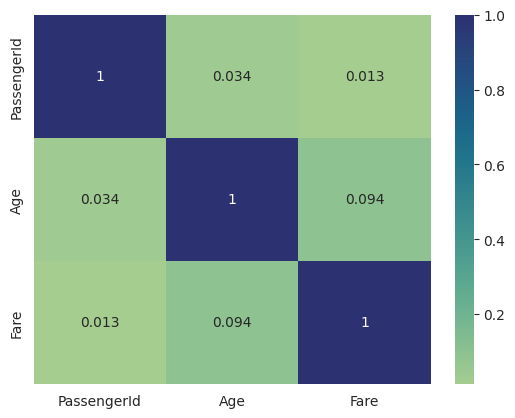

In [209]:
# representing a correlation plot with seaborn heatmap
sns.heatmap(data.corr(), annot = True,cmap="crest")
sns.color_palette("crest", as_cmap=True)